集群中心的座標: [[2.1 2.1]
 [1.1 1.1]]
預測: [1 1 1 0 0 0]
實際: [1, 1, 1, 0, 0, 0]
預測[1, 1],[2.3,2.1]: [1 0]


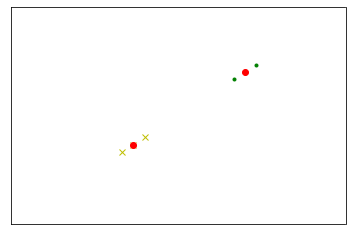

In [10]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from time import time 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

X= np.array([[1,1],[1.1,1.1],[1.2,1.2],
   [2,2], [2.1,2.1], [2.2,2.2]])
y=[1,1,1,
  0,0,0,]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
print("集群中心的座標:",kmeans.cluster_centers_)
print("預測:",kmeans.predict(X))
print("實際:",y)
print("預測[1, 1],[2.3,2.1]:",kmeans.predict([[1, 1],[2.3,2.1]]))

plt.axis([0,3,0,3])
plt.plot(X[:3,0], X[:3,1], 'yx' )
plt.plot(X[3:,0], X[3:,1], 'g.'  )
plt.plot(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 'ro')
plt.xticks(())
plt.yticks(())
plt.show()

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

iris = datasets.load_iris()

iris_X_train , iris_X_test , iris_y_train , iris_y_test = train_test_split(iris.data,iris.target,test_size=0.2)

kmeans = KMeans(n_clusters = 3)
kmeans_fit =kmeans.fit(iris_X_train)

print("實際",iris_y_train)
print("預測",kmeans_fit.labels_)

iris_y_train[iris_y_train==1]=11
iris_y_train[iris_y_train==0]=1
iris_y_train[iris_y_train==11]=0
print("調整",iris_y_train)

score = metrics.accuracy_score(iris_y_train,kmeans.predict(iris_X_train))
print('準確率:{0:f}'.format(score))

實際 [1 0 1 0 0 2 2 1 2 2 0 0 2 0 0 2 2 0 2 0 2 2 2 1 2 0 1 2 0 0 2 2 2 2 0 1 1
 0 0 1 2 1 1 1 1 1 1 1 2 2 0 1 2 0 1 1 2 0 2 0 2 0 1 0 1 0 2 1 0 1 2 1 2 2
 1 0 1 0 1 1 0 0 0 1 2 2 1 0 0 1 0 1 2 2 0 2 1 1 2 1 2 2 0 0 1 0 0 1 1 0 2
 0 0 2 2 0 0 2 0 1]
預測 [0 1 0 1 1 2 2 0 2 0 1 1 2 1 1 2 2 1 0 1 0 2 2 0 0 1 0 0 1 1 2 0 2 2 1 0 0
 1 1 0 2 0 0 0 0 0 0 0 2 2 1 0 0 1 0 0 0 1 2 1 2 1 0 1 0 1 2 0 1 0 0 0 2 0
 0 1 0 1 0 0 1 1 1 0 2 0 0 1 1 0 1 0 0 2 1 2 0 0 2 0 2 2 1 1 0 1 1 0 0 1 2
 1 1 2 2 1 1 0 1 0]
調整 [0 1 0 1 1 2 2 0 2 2 1 1 2 1 1 2 2 1 2 1 2 2 2 0 2 1 0 2 1 1 2 2 2 2 1 0 0
 1 1 0 2 0 0 0 0 0 0 0 2 2 1 0 2 1 0 0 2 1 2 1 2 1 0 1 0 1 2 0 1 0 2 0 2 2
 0 1 0 1 0 0 1 1 1 0 2 2 0 1 1 0 1 0 2 2 1 2 0 0 2 0 2 2 1 1 0 1 1 0 0 1 2
 1 1 2 2 1 1 2 1 0]
準確率:0.891667


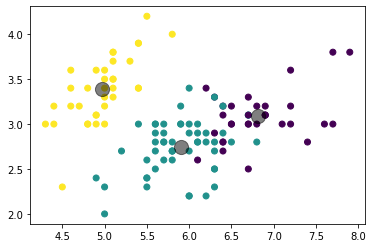

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import metrics

iris = datasets.load_iris()

iris_X_train , iris_X_test , iris_y_train , iris_y_test = train_test_split(iris.data,iris.target,test_size=0.2)

kmeans = KMeans(n_clusters = 3)
kmeans_fit =kmeans.fit(iris_X_train)
y_predict=kmeans.predict(iris_X_train)

x1=iris_X_train[:,0]
y1=iris_X_train[:,1]
plt.scatter(x1,y1, c=y_predict, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5);
plt.show()

Automatically created module for IPython interactive environment


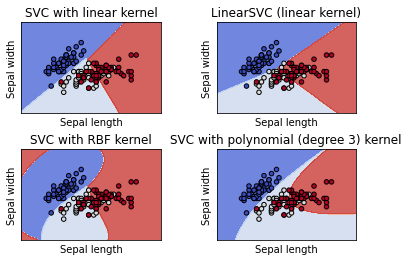

In [23]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

k-means:
特點：並一定能得到全局最優解(依賴於初始點選取)，所以常用多次運行，取最優，假設了均方誤差為計算群組分散度的最佳參數
優點：簡單快速，複雜度為O(nkt),n為樣本數，k為類別數，t為迭代數
缺點：只對簇的平均值被定義下才能被使用，不適合某些分類屬性，虛實線給定簇數K，對初值敏感，不適合發現大小差別很大的簇，對噪聲、孤立點敏感(對平均值產生極大影響)
SVM：
特點：將低維空間映射到高維空間，實現線性可分
優點：可實現非線性分類，可用於分類與回歸，低泛化誤差，易解釋
缺點：對核函數以及參數敏感